In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt

In [3]:
!git clone https://github.com/zaza-ipynb/Data-Mining-Cup-2019.git
!unzip -o Data-Mining-Cup-2019/dmc.zip

Cloning into 'Data-Mining-Cup-2019'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 7), reused 13 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 13.76 MiB | 1.42 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Archive:  Data-Mining-Cup-2019/dmc.zip
  inflating: DMC_2019_task/DATA-MINING-CUP-2019-features.pdf  
  inflating: DMC_2019_task/DATA-MINING-CUP-2019-task.pdf  
  inflating: DMC_2019_task/test.csv  
  inflating: DMC_2019_task/train.csv  


In [2]:
df = pd.read_csv('DMC_2019_task/train.csv', sep='|')
pred = pd.read_csv('DMC_2019_task/test.csv', sep='|')
real = pd.read_csv('Data-Mining-Cup-2019/DMC-2019-realclass.csv', sep='|')

# Data Overview

In [3]:
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [4]:
pred.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [5]:
real.head()

,fraud
0,0
1,0
2,0
3,0
4,0


### Class Distribution and analisis of data characteristics

In [6]:
print('fraud :',(df['fraud'] == 1).sum())
print('not fraud :',(df['fraud'] == 0).sum())
print('percentage fraudulent :', len(df[df.fraud ==1])/len(df)*100, '%')
print('percentage non-fraudulent :', len(df[df.fraud ==0])/len(df)*100, '%')

fraud : 104
not fraud : 1775
percentage fraudulent : 5.534858967535923 %
percentage non-fraudulent : 94.46514103246408 %


/tmp/ipykernel_3403/1375687245.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts = [df[df.fraud == 0].count()[0], df[df.fraud == 1].count()[0]]
/tmp/ipykernel_3403/1375687245.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts = [df[df.fraud == 0].count()[0], df[df.fraud == 1].count()[0]]


<Axes: title={'center': 'Distribution of classes'}>

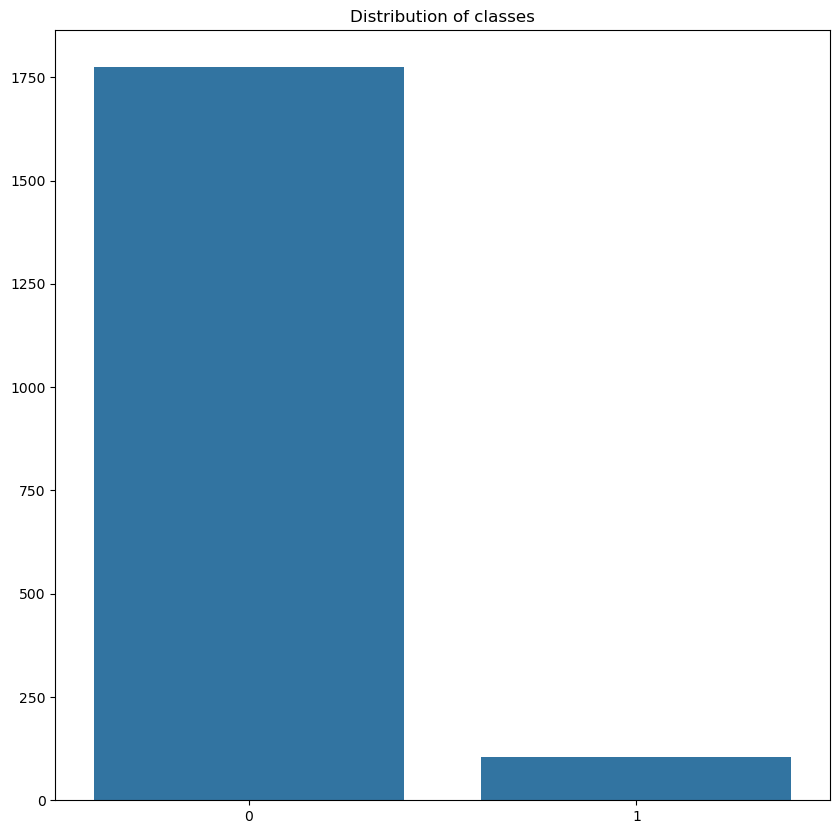

In [7]:
counts = [df[df.fraud == 0].count()[0], df[df.fraud == 1].count()[0]]
plt.figure(figsize=(10,10))
plt.title("Distribution of classes")
sns.barplot(x=[0,1], y=counts)

Distribusi observasi sangat tidak seimbang. Ini dapat menyebabkan situasi ketika model akan belajar untuk mengklasifikasikan semua contoh sebagai negatif yang akan menghasilkan akurasi tinggi dengan nilai aktual nol.

Sebelum melihat klasifikasi, mari kita selidiki fitur-fiturnya.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
 9   fraud                      1879 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


In [11]:
df.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


### Distribusi Fitur 

/tmp/ipykernel_3403/1288216762.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.trustLevel, kde=True)


<Axes: title={'center': 'Distribusi fitur trustlevel'}, xlabel='trustLevel', ylabel='Density'>

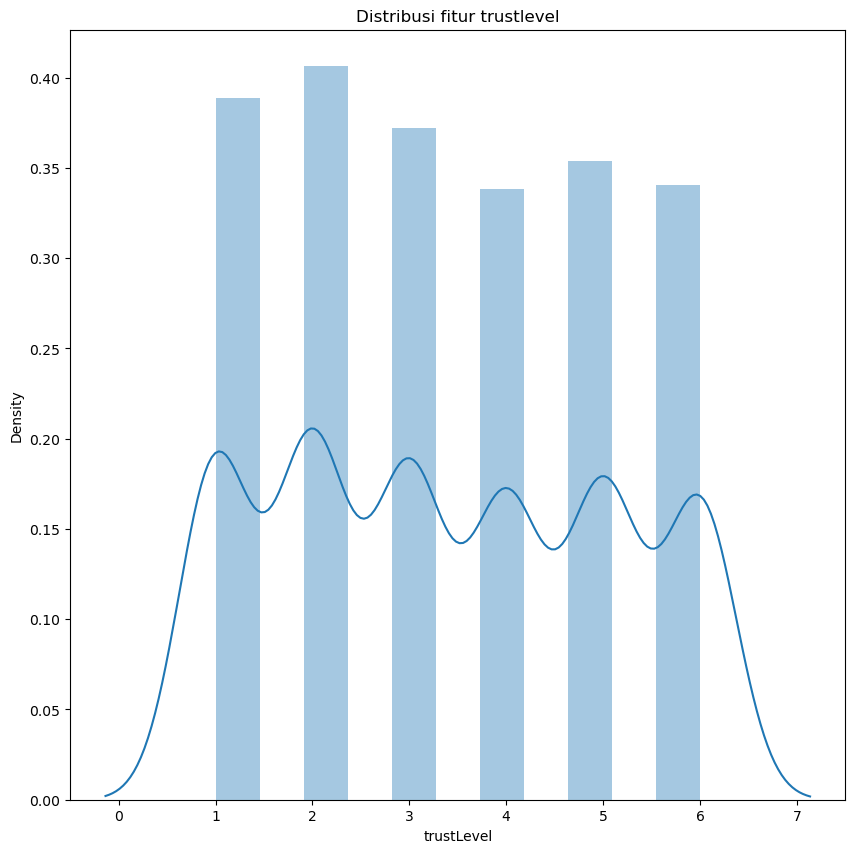

In [15]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur trustlevel")
sns.distplot(df.trustLevel, kde=True)

/tmp/ipykernel_3403/4277427873.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.totalScanTimeInSeconds, kde=True)


<Axes: title={'center': 'Distribusi fitur totalScanTimeInSeconds'}, xlabel='totalScanTimeInSeconds', ylabel='Density'>

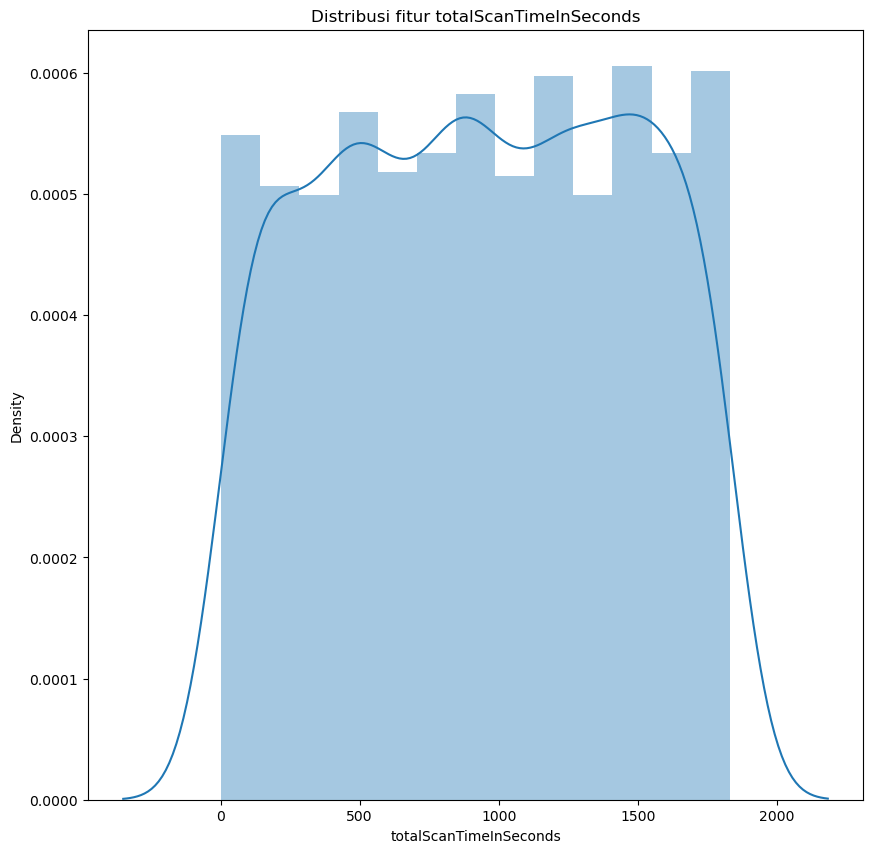

In [16]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur totalScanTimeInSeconds")
sns.distplot(df.totalScanTimeInSeconds, kde=True)

/tmp/ipykernel_3403/2787657356.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.grandTotal, kde=True)


<Axes: title={'center': 'Distribusi fitur grandtotal'}, xlabel='grandTotal', ylabel='Density'>

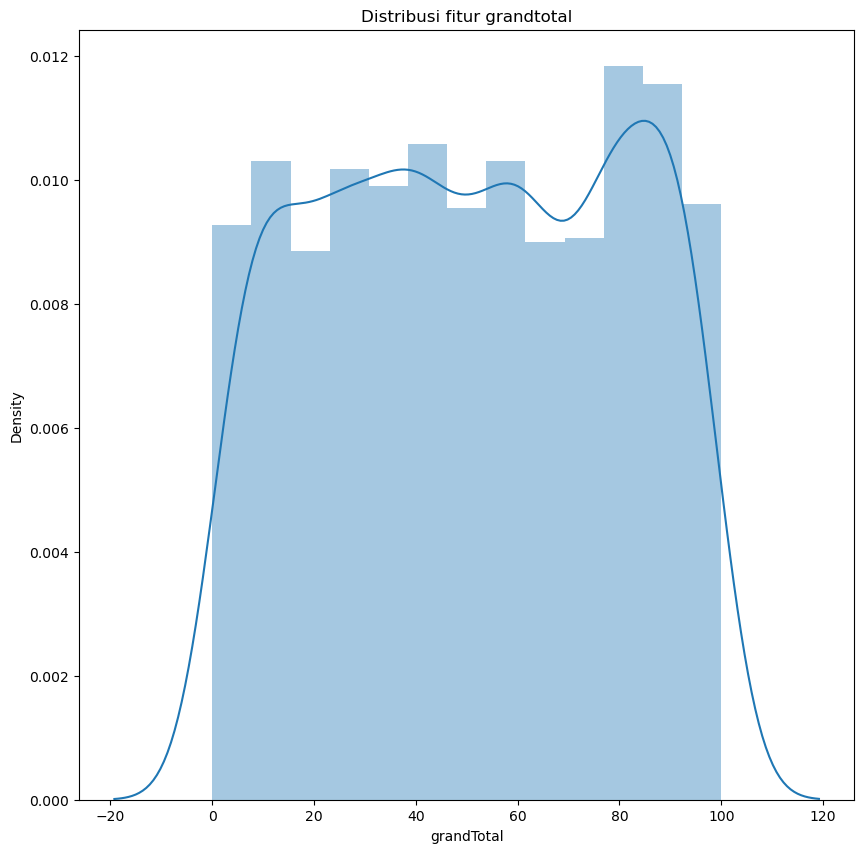

In [17]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur grandtotal")
sns.distplot(df.grandTotal, kde=True)

/tmp/ipykernel_3403/2833773428.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.lineItemVoids, kde=True)


<Axes: title={'center': 'Distribusi fitur lineItemVoid'}, xlabel='lineItemVoids', ylabel='Density'>

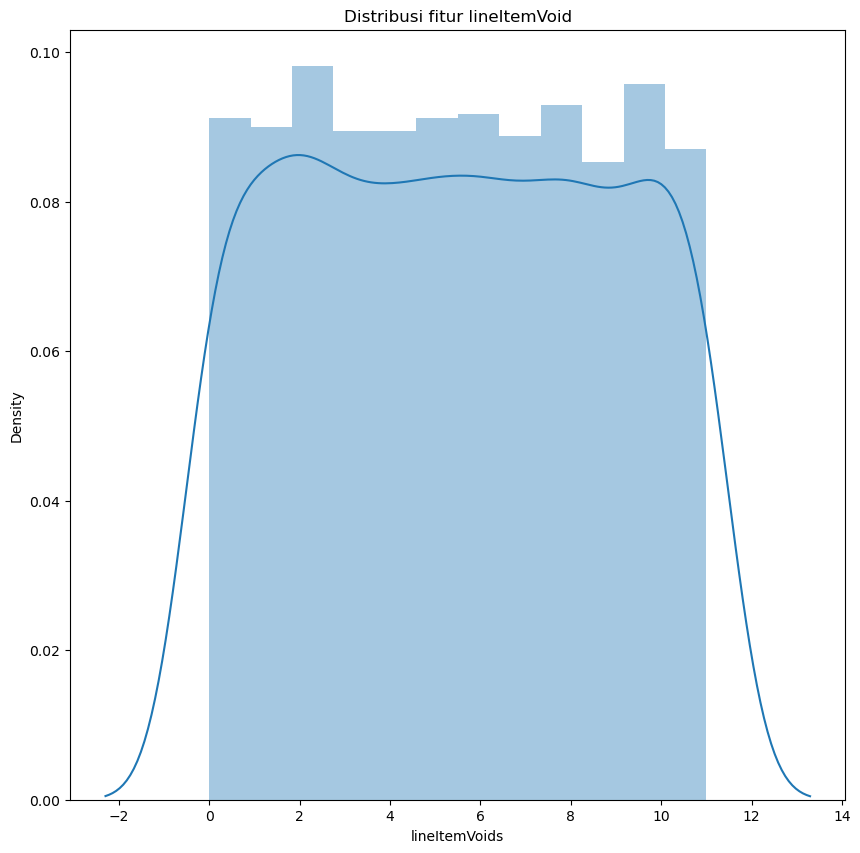

In [18]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur lineItemVoid")
sns.distplot(df.lineItemVoids, kde=True)

/tmp/ipykernel_3403/3041037493.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.scansWithoutRegistration, kde=True)


<Axes: title={'center': 'Distribusi fitur scansWithoutRegistration'}, xlabel='scansWithoutRegistration', ylabel='Density'>

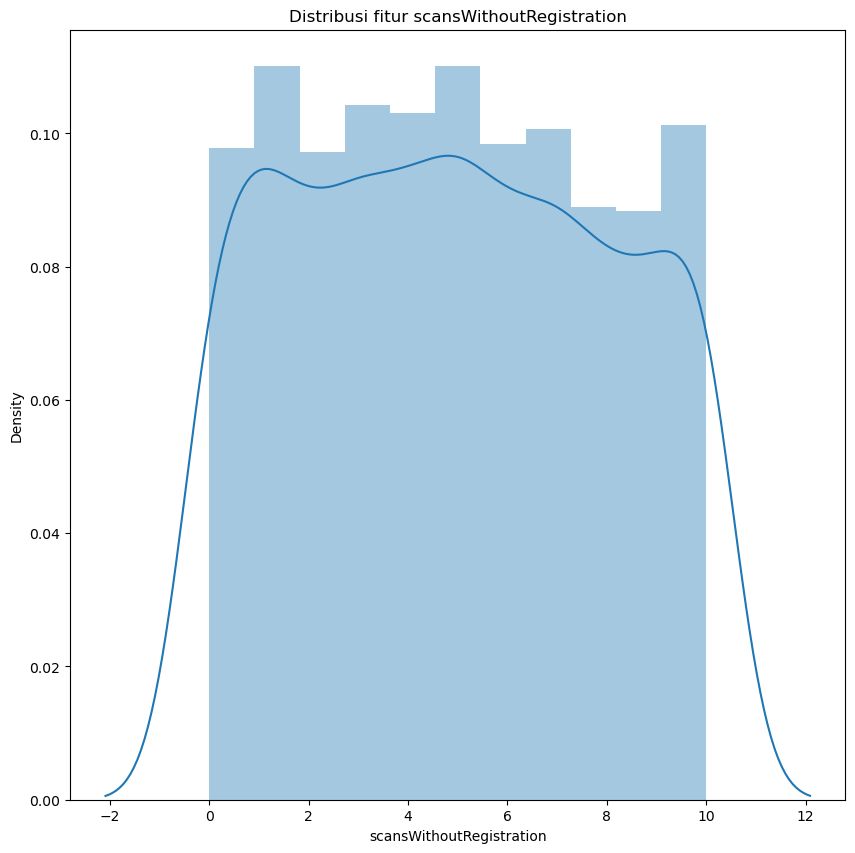

In [19]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur scansWithoutRegistration")
sns.distplot(df.scansWithoutRegistration, kde=True)

/tmp/ipykernel_3403/861054810.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.quantityModifications, kde=True)


<Axes: title={'center': 'Distribusi fitur quantityModifications'}, xlabel='quantityModifications', ylabel='Density'>

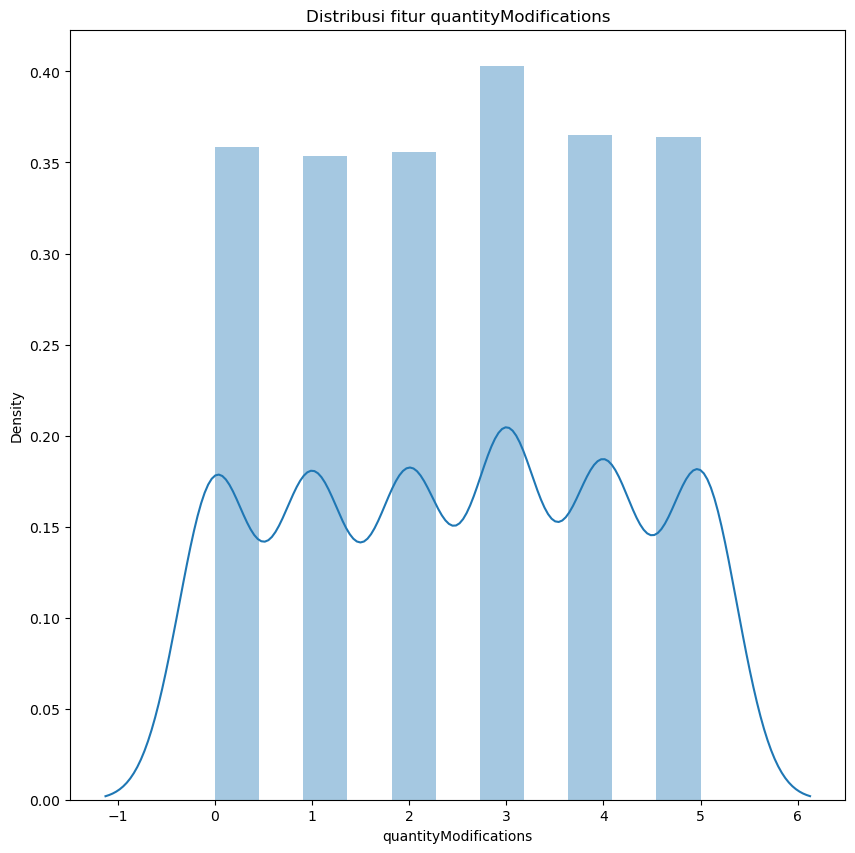

In [20]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur quantityModifications")
sns.distplot(df.quantityModifications, kde=True)

/tmp/ipykernel_3403/304899496.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.scannedLineItemsPerSecond, kde=True, rug=True)


<Axes: title={'center': 'Distribusi fitur scannedLineItemsPerSecond'}, xlabel='scannedLineItemsPerSecond', ylabel='Density'>

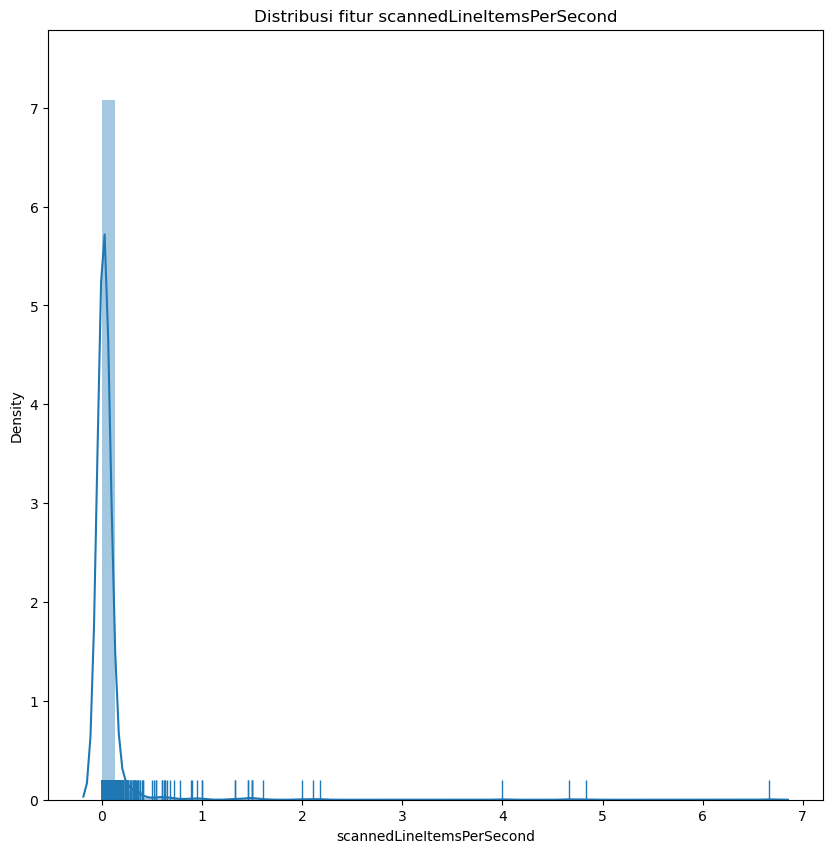

In [21]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur scannedLineItemsPerSecond")
sns.distplot(df.scannedLineItemsPerSecond, kde=True, rug=True)

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribusi fitur valuePerSecond")
sns.distplot(df.valuePerSecond, kde=True, rug=True)

/tmp/ipykernel_3403/3444238742.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.lineItemVoidsPerPosition, kde=True, rug=True)


<Axes: title={'center': 'Distribusi Fitur lineItemVoidsPerPosition'}, xlabel='lineItemVoidsPerPosition', ylabel='Density'>

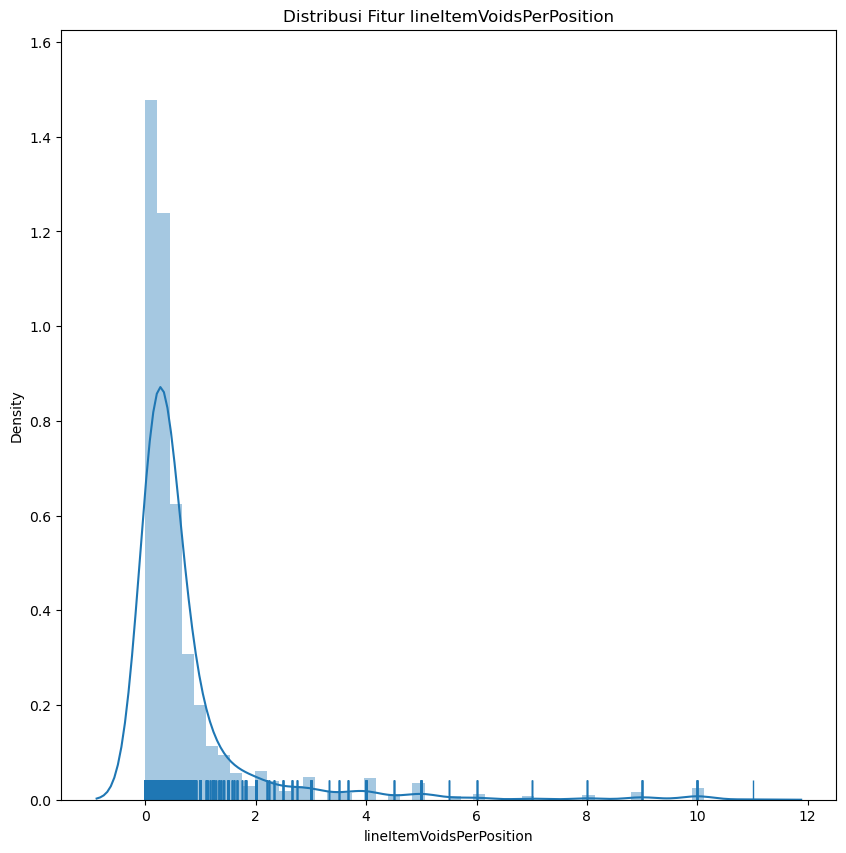

In [23]:
plt.figure(figsize=(10,10))
plt.title("Distribusi Fitur lineItemVoidsPerPosition")
sns.distplot(df.lineItemVoidsPerPosition, kde=True, rug=True)

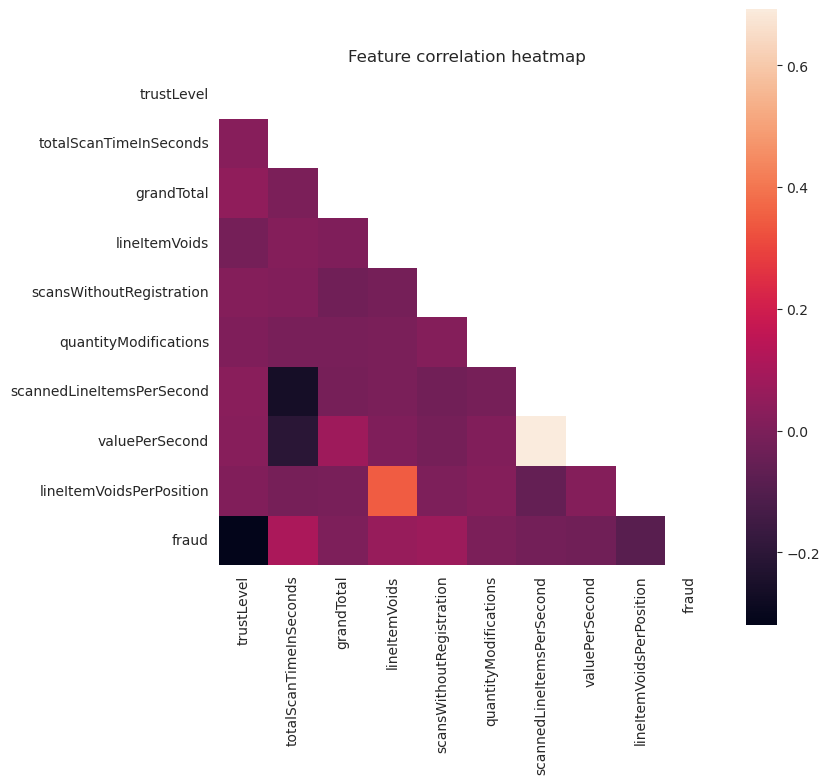

In [24]:
cmatrix = df.corr()
mask = np.zeros_like(cmatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(8,8))
    plt.title("Feature correlation heatmap")
    sns.heatmap(cmatrix, mask=mask, square=True)

Potongan kode ini biasanya digunakan dalam **visualisasi matriks korelasi atau confusion matrix**, terutama saat ingin menampilkan **hanya bagian bawah atau atas** dari sebuah matriks simetris, misalnya dengan `seaborn.heatmap`.

---

### Penjelasan Kode:

```python
mask = np.zeros_like(cmatrix)
```

* Membuat sebuah array `mask` dengan **bentuk yang sama seperti** `cmatrix`, tetapi semua elemennya nol.
* `cmatrix` kemungkinan adalah matriks 2D, misalnya hasil dari `confusion_matrix` atau `correlation_matrix`.

```python
mask[np.triu_indices_from(mask)] = True
```

* Mengubah **bagian segitiga atas** dari matriks `mask` menjadi `True`.
* `np.triu_indices_from(mask)` mengembalikan indeks untuk bagian **upper triangle** (di atas diagonal utama).
* Setelah baris ini, `mask` adalah matriks boolean: `True` di atas diagonal, `False` di bawahnya.

---

### Contoh:

Misal `cmatrix` adalah:

```
[[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]]
```

Setelah kode di atas:

```
mask =
[[ True,  True,  True],
 [False,  True,  True],
 [False, False,  True]]
```

---

### Tujuan Umum:

Potongan kode ini **digunakan untuk masking visualisasi heatmap**, contohnya:

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cmatrix, mask=mask, annot=True)
plt.show()
```

Hasilnya: hanya **bagian bawah (segitiga bawah)** dari matriks yang divisualisasikan, bagian atas (redundan) disembunyikan.

---

### Kapan Dipakai?

* Saat visualisasi **correlation matrix**, untuk menghindari duplikasi informasi (karena simetris).
* Saat ingin fokus pada satu bagian dari matriks (atas atau bawah).
* Saat membuat heatmap yang lebih bersih atau mudah dibaca.

Kalau kamu ingin tahu cara pakainya di konteks spesifikmu (misalnya korelasi antar fitur), boleh kirim data atau contoh kode lengkap.


In [26]:
df.corr().fraud

trustLevel                  -0.319765
totalScanTimeInSeconds       0.110414
grandTotal                   0.001421
lineItemVoids                0.063496
scansWithoutRegistration     0.074123
quantityModifications       -0.000864
scannedLineItemsPerSecond   -0.023085
valuePerSecond              -0.028873
lineItemVoidsPerPosition    -0.090116
fraud                        1.000000
Name: fraud, dtype: float64

Tidak banyak yang terjadi dalam heatmap correlation. Selain fitur yang jelas berkorelasi (seperti valuePerSecond dan scannedLineItemsPerSecond) kami tidak mengamati nilai yang signifikan. Waktu pemindaian berkorelasi negatif dengan kecepatan pemindaian dan sedikit korelasi negatif dapat diamati antara trustLevel dan kelas yang ditugaskan. Mari kita lihat lebih dekat fitur trustLevel.

<h1> TrustLevel </h1>
Tampaknya trustlevel tidak berkorelasi secara signifikan dengan nilai kelas tetapi mungkin disebabkan oleh distribusi antar kelas yang sangat tidak merata. Mungkin menguntungkan untuk memeriksa bagaimana fitur ini didistribusikan di antara transaksi fraud dan non-fraud secara terpisah.

/tmp/ipykernel_3403/3165731503.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud']==1].trustLevel, kde=True, ax=ax1)
/tmp/ipykernel_3403/3165731503.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud']==1].trustLevel, kde=False, ax=ax2)


<Axes: title={'center': 'histogram trustLevel dalam fraudulent transactions'}, xlabel='trustLevel'>

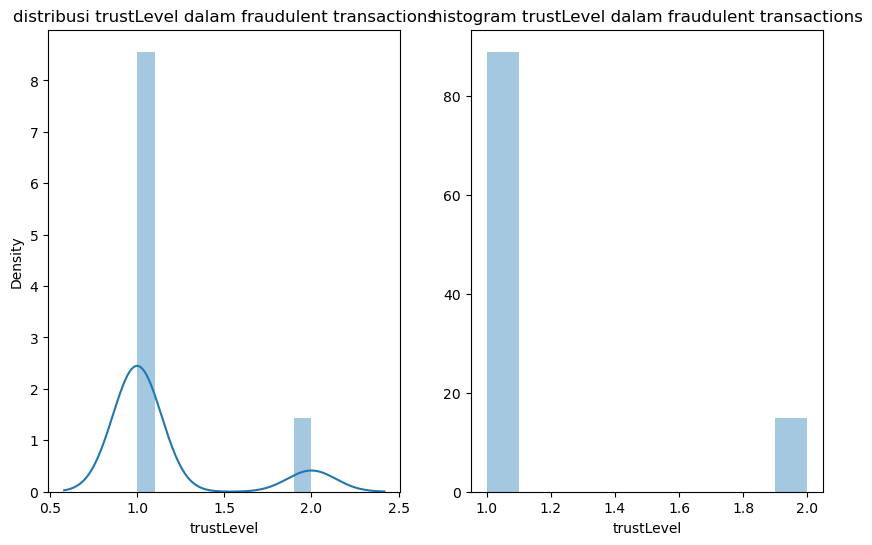

In [27]:
figure = plt.figure(figsize=(10,6))
ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122)
ax1.set_title("distribusi trustLevel dalam fraudulent transactions")
ax2.set_title("histogram trustLevel dalam fraudulent transactions")
sns.distplot(df[df['fraud']==1].trustLevel, kde=True, ax=ax1)
sns.distplot(df[df['fraud']==1].trustLevel, kde=False, ax=ax2)

In [28]:
df[df['fraud']==1].trustLevel.unique()

array([1, 2])

/tmp/ipykernel_3403/77142397.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud']==0].trustLevel, kde=True, ax=ax1)
/tmp/ipykernel_3403/77142397.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['fraud']==0].trustLevel, kde=False, ax=ax2)


<Axes: title={'center': 'histogram trustLevel dalam non-fraudulent transactions'}, xlabel='trustLevel'>

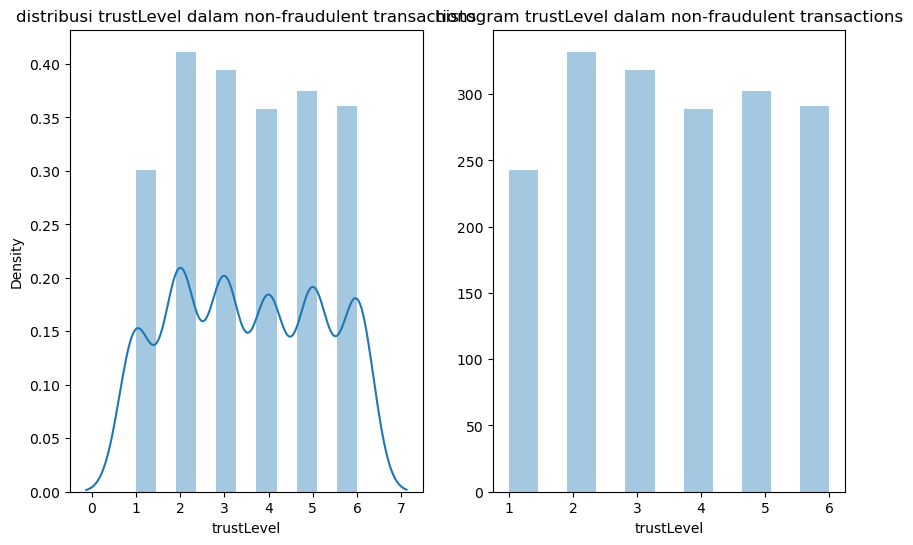

In [29]:
figure = plt.figure(figsize=(10,6))
ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122)
ax1.set_title("distribusi trustLevel dalam non-fraudulent transactions")
ax2.set_title("histogram trustLevel dalam non-fraudulent transactions")
sns.distplot(df[df['fraud']==0].trustLevel, kde=True, ax=ax1)
sns.distplot(df[df['fraud']==0].trustLevel, kde=False, ax=ax2)

In [30]:
df[df["fraud"]==0].trustLevel.unique()

array([5, 3, 6, 2, 4, 1])

Dalam kasus transaksi non-fraud, distibusinya lebih merata. Meskipun ada penurunan yang signifikan dari transaksi dengan trustlevel sama dengan 1. trustLevel dapat menjadi indikator yang baik apakah klien meminta cek lanjutan tetapi tidak pada akhirnya membedakan transaksi fraud dan non-fraud.

### Pembuatan subset data, Preprocessing, Feature Engineering

Membuat fitur baru (feature engineering dengan list comprehension yaitu total items yaitu jumlah keseluruhan barang dalam satu transaksi) dan percobaan downsampling agar kelas seimbang


In [31]:
from tqdm import tqdm

df['TotalItemsScanned'] = [df.iloc[i].totalScanTimeInSeconds * df.iloc[i].scannedLineItemsPerSecond for i in tqdm(range(len(df)))]
pred['TotalItemsScanned'] = [pred.iloc[i].totalScanTimeInSeconds * pred.iloc[i].scannedLineItemsPerSecond for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [00:41<00:00, 11995.87it/s]


Kode yang kamu tunjukkan adalah Python dengan library **pandas** dan **tqdm**, digunakan untuk menghitung kolom baru bernama `TotalItemsScanned` berdasarkan hasil perkalian dua kolom lain untuk setiap baris pada DataFrame `df` dan `pred`.

---

### Penjelasan Kode:

```python
from tqdm import tqdm
```

* Mengimpor `tqdm`, library untuk menampilkan **progress bar** saat proses iterasi (berguna untuk loop yang lama).

---

```python
df['TotalItemsScanned'] = [
    df.iloc[i].totalScanTimeInSeconds * df.iloc[i].scannedLineItemsPerSecond 
    for i in tqdm(range(len(df)))
]
```

* Ini adalah **list comprehension** yang:

  * Melakukan loop untuk setiap indeks `i` dalam DataFrame `df`.
  * Mengakses baris ke-`i` pakai `df.iloc[i]`.
  * Mengambil nilai dari kolom `totalScanTimeInSeconds` dan `scannedLineItemsPerSecond` pada baris itu.
  * Mengalikannya dan menyimpan hasilnya di kolom baru `TotalItemsScanned`.
* `tqdm(...)` membungkus `range(len(df))` untuk menunjukkan progress bar saat loop berjalan.

Baris kedua sama, tapi untuk DataFrame `pred`:

```python
pred['TotalItemsScanned'] = [
    pred.iloc[i].totalScanTimeInSeconds * pred.iloc[i].scannedLineItemsPerSecond 
    for i in tqdm(range(len(pred)))
]
```

---

### Tujuan Kode:

Untuk setiap baris pada DataFrame `df` dan `pred`, dihitung:

```
TotalItemsScanned = totalScanTimeInSeconds × scannedLineItemsPerSecond
```

Dengan kata lain: menghitung **total item yang discan** berdasarkan waktu dan kecepatan scan.

---

### Catatan:

Cara ini **berjalan lambat** untuk dataset besar karena memakai `iloc[i]` di dalam loop.

#### Versi lebih cepat dan pythonic:

```python
df['TotalItemsScanned'] = df['totalScanTimeInSeconds'] * df['scannedLineItemsPerSecond']
pred['TotalItemsScanned'] = pred['totalScanTimeInSeconds'] * pred['scannedLineItemsPerSecond']
```

Ini jauh lebih cepat karena menggunakan **vectorized operations** milik pandas (tanpa loop eksplisit).

---

### Kesimpulan:

Kode ini menghitung total item yang dipindai untuk setiap baris, tapi menggunakan cara yang tidak efisien. Sebaiknya gunakan versi vectorized seperti di atas, kecuali kamu butuh logika yang lebih kompleks per baris.

Kalau kamu mau saya bantu optimalkan bagian lainnya, kirim saja bagian berikutnya ya.


In [32]:
# avgValuePerScan:
df['avgTimePerScanItem'] = [1/ df.iloc[i].scannedLineItemsPerSecond for i in tqdm(range(len(df)))]
df['avgValuePerScanItem'] = [df.iloc[i].avgTimePerScanItem * df.iloc[i].valuePerSecond for i in tqdm(range(len(df)))]

# manual feature generation - "totalItemsScanned" ratios

# withoutRegisPerPosition
df['WithoutRegisPerPosition'] =[df.iloc[i].scansWithoutRegistration / df.iloc[i].TotalItemsScanned for i in tqdm(range(len(df)))]
# rasio scansWithoutRegis dalam totalScan
# setara dengan lineItemVoidsPerPosition
# Mungkin menunjukkan seberapa baru atau ambivalennya seorang pelanggan. Diharapkan lebih tinggi untuk "trustLevel" rendah
# quantiModPerPosition
df['quantiModPerPosition'] = [df.iloc[i].quantityModifications / df.iloc[i].TotalItemsScanned for i in tqdm(range(len(df)))]
# ratio dari quanityMods dalam TotalItemsScanned



# manual feature generation - "grandTotal" ratios

# lineItemVoidsPerTotal
df['lineItemVoidsPerTotal'] = [df.iloc[i].lineItemVoids / df.iloc[i].grandTotal for i in tqdm(range(len(df)))]

# withoutRegisPerTotal
df['withoutRegisPerTotal'] = [df.iloc[i].scansWithoutRegistration / df.iloc[i].grandTotal for i in tqdm(range(len(df)))]

# quantiModPerTotal
df['quantiModPerTotal'] = [df.iloc[i].quantityModifications / df.iloc[i].grandTotal for i in tqdm(range(len(df)))]



# manual feature generation - "totalScanTimeInSeconds" ratios

# lineItemVoidsPerTime
df['lineItemVoidsPerTime'] = [df.iloc[i].lineItemVoids / df.iloc[i].totalScanTimeInSeconds for i in tqdm(range(len(df)))]

# withoutRegisPerTime
df['withoutRegisPerTime'] = [df.iloc[i].scansWithoutRegistration / df.iloc[i].totalScanTimeInSeconds for i in tqdm(range(len(df)))]

# quantiModPerTime
df['quantiModPerTime'] = [df.iloc[i].quantityModifications / df.iloc[i].totalScanTimeInSeconds for i in tqdm(range(len(df)))]

100%|██████████| 1879/1879 [00:00<00:00, 10024.71it/s]


In [33]:
#lakukan hal yang sama untuk data test
pred['avgTimePerScanItem'] = [1/ pred.iloc[i].scannedLineItemsPerSecond for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [00:20<00:00, 24100.23it/s]


In [34]:
pred['avgValuePerScanItem'] = [pred.iloc[i].avgTimePerScanItem * pred.iloc[i].valuePerSecond for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [00:46<00:00, 10635.32it/s]


In [35]:
pred['WithoutRegisPerPosition'] =[pred.iloc[i].scansWithoutRegistration / pred.iloc[i].TotalItemsScanned for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [00:43<00:00, 11391.77it/s]


In [36]:
pred['quantiModPerPosition'] = [pred.iloc[i].quantityModifications / pred.iloc[i].TotalItemsScanned for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [00:44<00:00, 11073.06it/s]


In [37]:
pred['lineItemVoidsPerTotal'] = [pred.iloc[i].lineItemVoids / pred.iloc[i].grandTotal for i in tqdm(range(len(pred)))]

  3%|▎         | 13380/498121 [00:01<00:44, 10794.25it/s]/tmp/ipykernel_3403/3378836937.py:1: RuntimeWarning: invalid value encountered in scalar divide
  pred['lineItemVoidsPerTotal'] = [pred.iloc[i].lineItemVoids / pred.iloc[i].grandTotal for i in tqdm(range(len(pred)))]
  4%|▍         | 18750/498121 [00:01<00:45, 10577.03it/s]/tmp/ipykernel_3403/3378836937.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  pred['lineItemVoidsPerTotal'] = [pred.iloc[i].lineItemVoids / pred.iloc[i].grandTotal for i in tqdm(range(len(pred)))]
100%|██████████| 498121/498121 [00:43<00:00, 11404.79it/s]


In [38]:
pred['withoutRegisPerTotal'] = [pred.iloc[i].scansWithoutRegistration / pred.iloc[i].grandTotal for i in tqdm(range(len(pred)))]

  3%|▎         | 12884/498121 [00:01<00:46, 10419.96it/s]/tmp/ipykernel_3403/4276049892.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  pred['withoutRegisPerTotal'] = [pred.iloc[i].scansWithoutRegistration / pred.iloc[i].grandTotal for i in tqdm(range(len(pred)))]
  6%|▌         | 29368/498121 [00:02<00:45, 10288.10it/s]/tmp/ipykernel_3403/4276049892.py:1: RuntimeWarning: invalid value encountered in scalar divide
  pred['withoutRegisPerTotal'] = [pred.iloc[i].scansWithoutRegistration / pred.iloc[i].grandTotal for i in tqdm(range(len(pred)))]
100%|██████████| 498121/498121 [00:42<00:00, 11592.97it/s]


In [39]:
pred['quantiModPerTotal'] = [pred.iloc[i].quantityModifications / pred.iloc[i].grandTotal for i in tqdm(range(len(pred)))]

  3%|▎         | 12951/498121 [00:01<00:48, 10026.92it/s]/tmp/ipykernel_3403/3280874612.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  pred['quantiModPerTotal'] = [pred.iloc[i].quantityModifications / pred.iloc[i].grandTotal for i in tqdm(range(len(pred)))]
 11%|█         | 53921/498121 [00:05<00:40, 10892.80it/s]/tmp/ipykernel_3403/3280874612.py:1: RuntimeWarning: invalid value encountered in scalar divide
  pred['quantiModPerTotal'] = [pred.iloc[i].quantityModifications / pred.iloc[i].grandTotal for i in tqdm(range(len(pred)))]
100%|██████████| 498121/498121 [00:44<00:00, 11105.47it/s]


In [40]:
pred['lineItemVoidsPerTime'] = [pred.iloc[i].lineItemVoids / pred.iloc[i].totalScanTimeInSeconds for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [00:45<00:00, 10957.84it/s]


In [41]:
pred['withoutRegisPerTime'] = [pred.iloc[i].scansWithoutRegistration / pred.iloc[i].totalScanTimeInSeconds for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [00:45<00:00, 11052.75it/s]


In [42]:
pred['quantiModPerTime'] = [pred.iloc[i].quantityModifications / pred.iloc[i].totalScanTimeInSeconds for i in tqdm(range(len(pred)))]

100%|██████████| 498121/498121 [00:46<00:00, 10679.45it/s]


In [43]:
pred.columns.tolist()

['trustLevel',
 'totalScanTimeInSeconds',
 'grandTotal',
 'lineItemVoids',
 'scansWithoutRegistration',
 'quantityModifications',
 'scannedLineItemsPerSecond',
 'valuePerSecond',
 'lineItemVoidsPerPosition',
 'TotalItemsScanned',
 'avgTimePerScanItem',
 'avgValuePerScanItem',
 'WithoutRegisPerPosition',
 'quantiModPerPosition',
 'lineItemVoidsPerTotal',
 'withoutRegisPerTotal',
 'quantiModPerTotal',
 'lineItemVoidsPerTime',
 'withoutRegisPerTime',
 'quantiModPerTime']

In [44]:
df.columns.tolist()

['trustLevel',
 'totalScanTimeInSeconds',
 'grandTotal',
 'lineItemVoids',
 'scansWithoutRegistration',
 'quantityModifications',
 'scannedLineItemsPerSecond',
 'valuePerSecond',
 'lineItemVoidsPerPosition',
 'fraud',
 'TotalItemsScanned',
 'avgTimePerScanItem',
 'avgValuePerScanItem',
 'WithoutRegisPerPosition',
 'quantiModPerPosition',
 'lineItemVoidsPerTotal',
 'withoutRegisPerTotal',
 'quantiModPerTotal',
 'lineItemVoidsPerTime',
 'withoutRegisPerTime',
 'quantiModPerTime']

In [45]:
if df.columns.tolist() == pred.columns.tolist():
    print("True")
else:
    print("False")

False


In [46]:
fraudulent = df[df['fraud']==1]
non_fraudulent = df[df['fraud']==0]
n = fraudulent.count()[0]
non_fraudulent_subset = non_fraudulent.sample(n)

/tmp/ipykernel_3403/4802223.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n = fraudulent.count()[0]


In [47]:
n_fraudulent = fraudulent.count()[0]
n_non_fraudulent = non_fraudulent.count()[0]
print("Fraudulent transactions: {}, non-fraudulent transactions: {}".format(n_fraudulent, n_non_fraudulent))

Fraudulent transactions: 104, non-fraudulent transactions: 1775


/tmp/ipykernel_3403/3032701478.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n_fraudulent = fraudulent.count()[0]
/tmp/ipykernel_3403/3032701478.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n_non_fraudulent = non_fraudulent.count()[0]


In [48]:
fraudulent.reset_index(drop=True, inplace=True)
non_fraudulent_subset.reset_index(drop=True, inplace=True)
dfs = pd.concat([fraudulent, non_fraudulent_subset])

In [49]:
print(dfs.count()[0])
dfs = dfs.sample(208).reset_index(drop=True)
dfs.head()

208


/tmp/ipykernel_3403/2128478819.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(dfs.count()[0])


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,...,avgTimePerScanItem,avgValuePerScanItem,WithoutRegisPerPosition,quantiModPerPosition,lineItemVoidsPerTotal,withoutRegisPerTotal,quantiModPerTotal,lineItemVoidsPerTime,withoutRegisPerTime,quantiModPerTime
0,1,1625,89.93,11,3,0,0.011692,0.055342,0.578947,1,...,85.526316,4.733158,0.157895,0.000000,0.122317,0.033359,0.000000,0.006769,0.001846,0.000000
1,1,1691,90.31,6,5,1,0.012419,0.053406,0.285714,1,...,80.523810,4.300476,0.238095,0.047619,0.066438,0.055365,0.011073,0.003548,0.002957,0.000591
2,1,1434,8.60,10,9,2,0.015342,0.005997,0.454545,1,...,65.181818,0.390909,0.409091,0.090909,1.162791,1.046512,0.232558,0.006974,0.006276,0.001395
3,2,1305,87.65,7,8,4,0.021456,0.067165,0.250000,1,...,46.607143,3.130357,0.285714,0.142857,0.079863,0.091272,0.045636,0.005364,0.006130,0.003065
4,1,421,6.80,9,9,2,0.066508,0.016152,0.321429,1,...,15.035714,0.242857,0.321429,0.071429,1.323529,1.323529,0.294118,0.021378,0.021378,0.004751


In [50]:
print(df.count()[0])

1879


/tmp/ipykernel_3403/970573444.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.count()[0])


In [51]:
#Feature selection based on correlation score
correlation = df.corr().fraud
dropped = [i for i in correlation.index if correlation[i] > -0.05 and correlation[i] < 0.05]
dropped

['grandTotal',
 'quantityModifications',
 'scannedLineItemsPerSecond',
 'valuePerSecond',
 'lineItemVoidsPerTotal',
 'withoutRegisPerTotal',
 'quantiModPerTotal',
 'lineItemVoidsPerTime',
 'withoutRegisPerTime',
 'quantiModPerTime']

In [52]:
#without downsampling
X_train = df.drop(columns=dropped+['fraud'])
y_train = df.fraud.values
X_test = pred.drop(columns=dropped)

#with downsampling
X = dfs.drop(columns=dropped+['fraud'])
y = dfs.fraud.values

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.fit_transform(X)


### Visualization of data using t-SNE
t-Distributed Stochastic Neighbor Embedding adalah algoritma pengurangan dimensi non-linier yang digunakan untuk mengeksplorasi data berdimensi tinggi. Ini memetakan data multi-dimensi ke dua atau lebih dimensi yang cocok untuk pengamatan manusia.

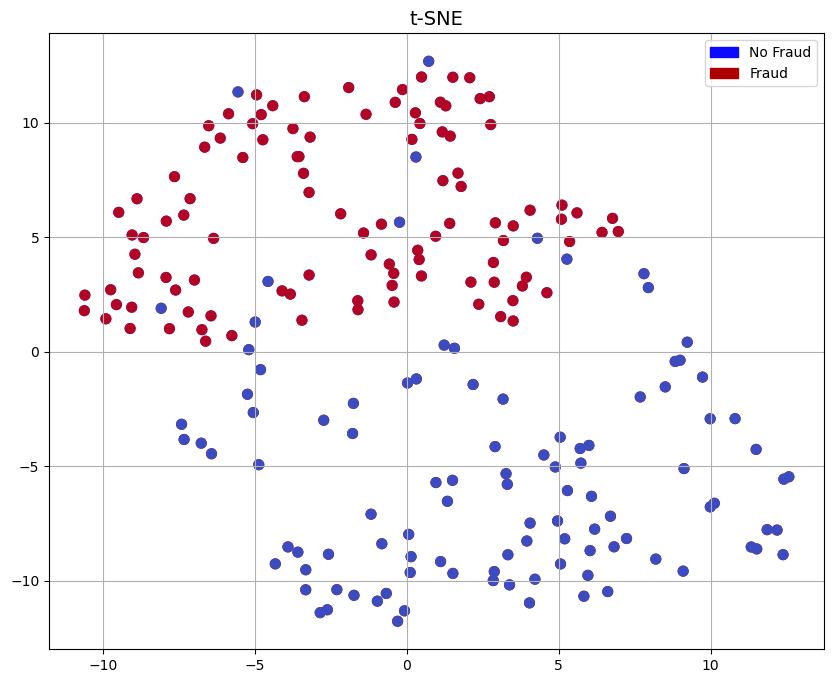

In [54]:
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches


reduced_x = TSNE(n_components=2, random_state=42).fit_transform(X)


f, ax = plt.subplots(figsize=(10,8))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(reduced_x[:,0], reduced_x[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(reduced_x[:,0], reduced_x[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

# Test on Imbalance Dateset

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
# import scikitplot as skplt

In [61]:
!conda show scikitplot


usage: conda [-h] [-v] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'show' (choose from 'activate', 'build', 'clean', 'commands', 'compare', 'config', 'content-trust', 'convert', 'create', 'deactivate', 'debug', 'develop', 'doctor', 'env', 'export', 'index', 'info', 'init', 'inspect', 'install', 'list', 'metapackage', 'notices', 'pack', 'package', 'remove', 'rename', 'render', 'repo', 'repoquery', 'run', 'search', 'server', 'skeleton', 'token', 'uninstall', 'update', 'upgrade')


In [63]:
X_imb = X_train
y_imb = y_train

X_train_imb, X_test_imb, y_train_imb, y_test_imb =  train_test_split(X_imb, y_imb, test_size=0.2)

clf_imb = clf = RandomForestClassifier(bootstrap=True,
                              max_depth=80,
                              max_features='sqrt',
                              min_samples_leaf=2,
                              min_samples_split=5,
                              n_estimators=1000)
clf_imb.fit(X_train_imb, y_train_imb)
clf_imb.score(X_test_imb, y_test_imb)

0.9813829787234043

In [64]:
prob_y_imb = clf_imb.predict_proba(X_test_imb)
prob_y_imb = [p[1] for p in prob_y_imb]
roc_auc_score(y_test_imb, prob_y_imb)

0.9977528089887641

In [ ]:
prob_y_imb_vis = clf_imb.predict_proba(X_test_imb)
skplt.metrics.plot_roc(y_test_imb, prob_y_imb_vis, figsize=(16, 10))
plt.show()

Downsampling dan oversampling adalah dua teknik dalam **penanganan dataset tidak seimbang (imbalanced dataset)** — situasi di mana satu kelas jauh lebih banyak dibanding kelas lainnya (contohnya: data fraud vs non-fraud, spam vs non-spam, dll).

---

## ⚖️ Tujuan

Agar model tidak bias ke kelas mayoritas dan dapat mengenali kelas minoritas dengan baik.

---

## 🟢 **Oversampling**

### ➕ Menambah data kelas minoritas

**Caranya:** menambahkan salinan (atau sintesis) data dari kelas minoritas.

### ✳️ Contoh:

Misalnya:

* Kelas 0 (non-fraud): 10.000 sampel
* Kelas 1 (fraud): 500 sampel

Setelah **oversampling**:

* Kelas 0: 10.000
* Kelas 1: 10.000 (duplicated/generated from the 500)

### 📦 Teknik Oversampling:

* **Random Oversampling** → menduplikasi data minoritas
* **SMOTE (Synthetic Minority Oversampling Technique)** → membuat data minoritas sintetis dengan interpolasi

### ✅ Kelebihan:

* Tidak kehilangan data dari kelas mayoritas
* Cocok untuk dataset kecil

### ❌ Kekurangan:

* Bisa menyebabkan overfitting (karena data yang sama diulang-ulang)
* SMOTE butuh waktu lebih lama

---

## 🔴 **Downsampling (Undersampling)**

### ➖ Mengurangi data kelas mayoritas

**Caranya:** membuang sebagian data dari kelas mayoritas supaya seimbang dengan kelas minoritas.

### ✳️ Contoh:

Misalnya:

* Kelas 0 (non-fraud): 10.000
* Kelas 1 (fraud): 500

Setelah **downsampling**:

* Kelas 0: 500 (diambil acak dari 10.000)
* Kelas 1: 500

### ✅ Kelebihan:

* Cepat dan sederhana
* Bisa menghindari bias terhadap mayoritas

### ❌ Kekurangan:

* Kehilangan informasi penting dari kelas mayoritas
* Tidak cocok kalau data sedikit

---

## 🔁 Contoh kode Python sederhana (dengan `resample`):

### 🎯 Downsampling

```python
from sklearn.utils import resample

# Pisahkan kelas mayoritas dan minoritas
majority = df[df.label == 0]
minority = df[df.label == 1]

# Undersample majority
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)

# Gabungkan ulang
df_balanced = pd.concat([majority_downsampled, minority])
```

### 🎯 Oversampling

```python
# Oversample minority
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

# Gabungkan ulang
df_balanced = pd.concat([majority, minority_upsampled])
```

---

Kalau kamu pakai `imbalanced-learn` (`imblearn`), ada fungsi khusus untuk `SMOTE`, `RandomOverSampler`, dan `RandomUnderSampler`.

Kalau kamu mau contohnya di dataset kamu (fraud detection), tinggal bilang.


## Test On Downsampling dataset

In [65]:
X_down = X
y_down = y

X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_down, y_down, test_size=0.2)

clf_down = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=123)
clf_down.fit(X_train_down, y_train_down)
clf_down.score(X_test_down, y_test_down)

0.9523809523809523

In [66]:
prob_y_down = clf_down.predict_proba(X_test_down)
prob_y_down = [p[1] for p in prob_y_down]
roc_auc_score(y_test_down, prob_y_down)

1.0

In [ ]:
prob_y_down_vis = clf_down.predict_proba(X_test_down)
skplt.metrics.plot_roc(y_test_down, prob_y_down_vis, figsize=(16, 10))
plt.show()